# Classification Example - kNN

Iris flower data set used for multi-class classification.

![Iris flower dataset](./images/example_classification_iris_knn.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.svm import SVC
from collections import Counter

## 1. Data Collection

Downloaded from Kaggle: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [2]:
df = pd.read_csv('iris.csv')
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

## 2. Data Exploration and Preparation

#### Data Exploration

In [3]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

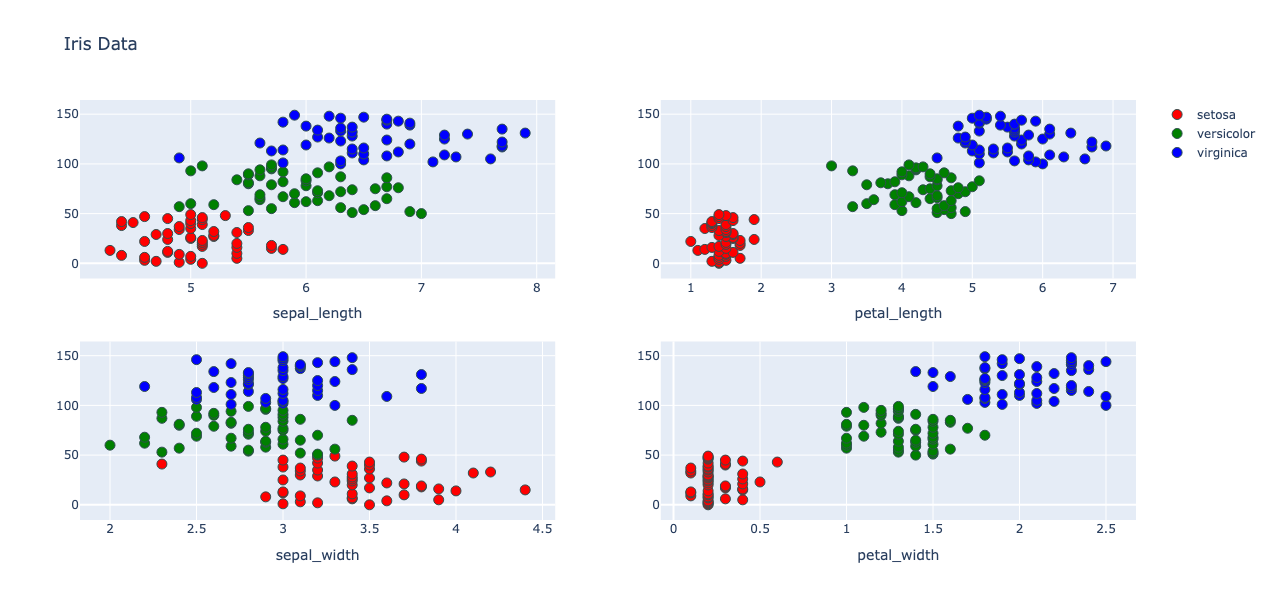

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a 2x2 subplot
fig = make_subplots(rows=2, cols=2)

# Create a color dictionary for each species
color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Add scatter plots to each subplot
for i, variable in enumerate(['sepal_length', 'petal_length', 'sepal_width', 'petal_width']):
    for species, color in color_dict.items():
        fig.add_trace(
            go.Scatter(
                x=df[df['species'] == species][variable],
                y=df[df['species'] == species].index,
                mode='markers',
                marker=dict(
                    color=color, # map species to colors
                    size=10,
                    line=dict(
                        width=1,
                        color='DarkSlateGrey'
                    )
                ),
                showlegend=False,
                hovertemplate = f"{species}<br>{variable}: %{{x}}<br>Index: %{{y}}"
            ),
            row=i//2 + 1,
            col=i%2 + 1
        )

    # Add x-axis label to each subplot
    fig.update_xaxes(title_text=variable, row=i//2 + 1, col=i%2 + 1)

# Add a trace for each species just for the legend
for species, color in color_dict.items():
    fig.add_trace(
        go.Scatter(
            x=[None], 
            y=[None],
            mode='markers',
            marker=dict(
                color=color,
                size=10,
                line=dict(
                    width=1,
                    color='DarkSlateGrey'
                )
            ),
            name=species,
            showlegend=True
        )
    )


# Update layout
fig.update_layout(
    width=800,
    height=600,
    title="Iris Data"
)

# Show the plot
fig.show()

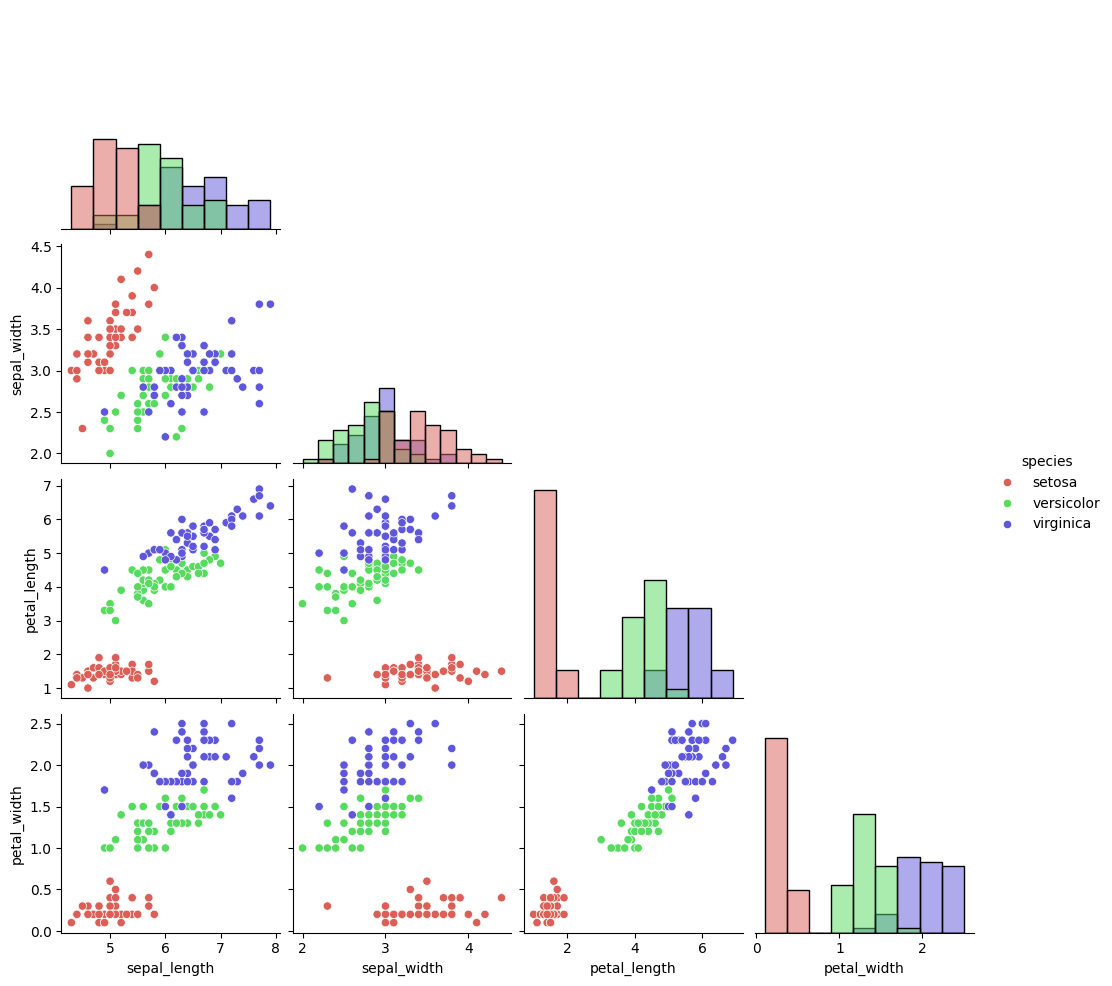

In [7]:
sns.pairplot(df,
    hue='species',
    diag_kind="hist",
    corner=True,
    palette='hls'
)

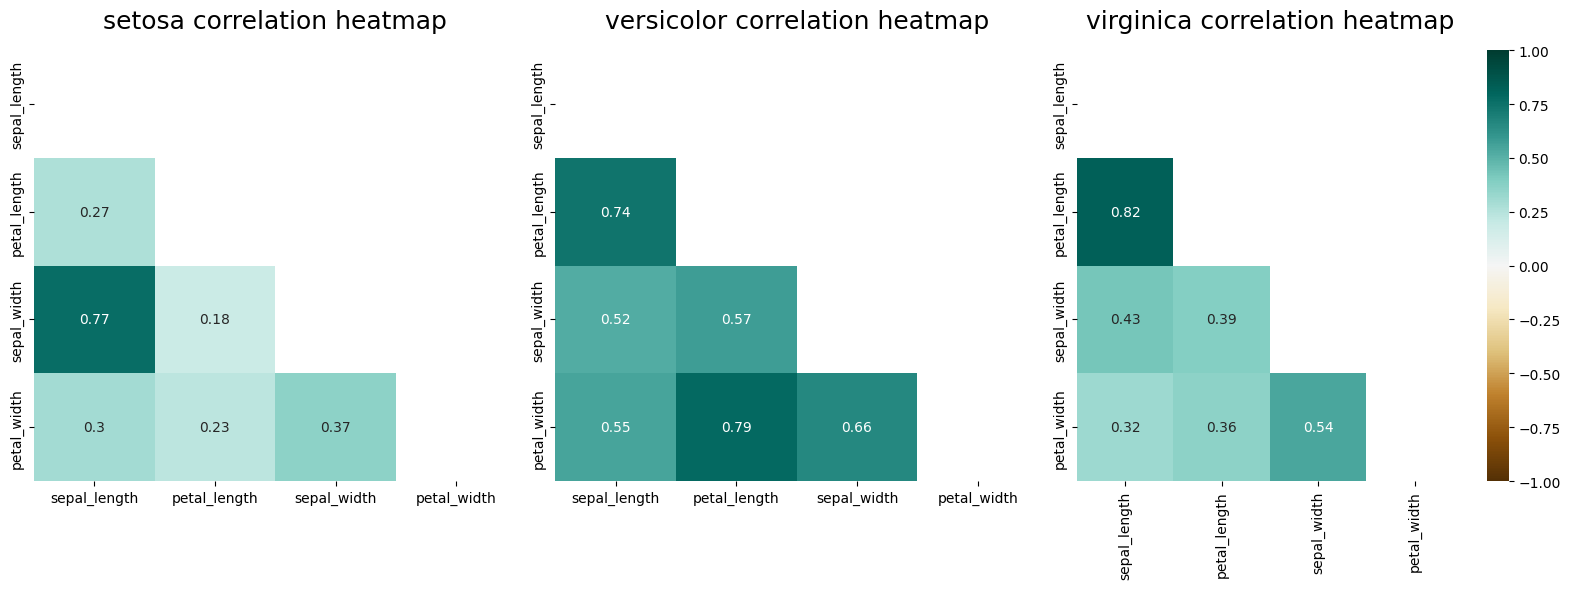

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

species = ['setosa', 'versicolor', 'virginica']
for i, ax in enumerate(axs):
    df_species = df[df["species"] == species[i]]
    mask = np.triu(
        np.ones_like(
            df_species[['sepal_length', 'petal_length', 'sepal_width', 'petal_width']].corr(method = "spearman"),
            dtype = bool
        )
    )
    heatmap = sns.heatmap(
        df_species[['sepal_length', 'petal_length', 'sepal_width', 'petal_width']].corr(method = "spearman"),
        mask = mask,
        vmin = -1,
        vmax = 1,
        annot = True ,
        cmap="BrBG",
        cbar=True if i == 2 else False,
        ax=ax
    )
    heatmap.set_title(
        f"{species[i]} correlation heatmap",
        fontdict = {'fontsize': 18},
        pad =16
    )

plt.tight_layout()
plt.show()

#### Data Preparation/Cleaning

Not necessary because it comes clean from Kaggle

## 3. Split Data into Training and Test Sets

In [9]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'petal_length', 'sepal_width', 'petal_width']].values,
    df["species"].values,
    test_size=0.2,
    random_state=42,
    # stratify=df["species"].values,
)

In [10]:
X_train.shape

(120, 4)

In [11]:
X_train[0], y_train[0]

(array([4.6, 1. , 3.6, 0.2]), 'setosa')

In [12]:
X_test[0]

array([6.1, 4.7, 2.8, 1.2])

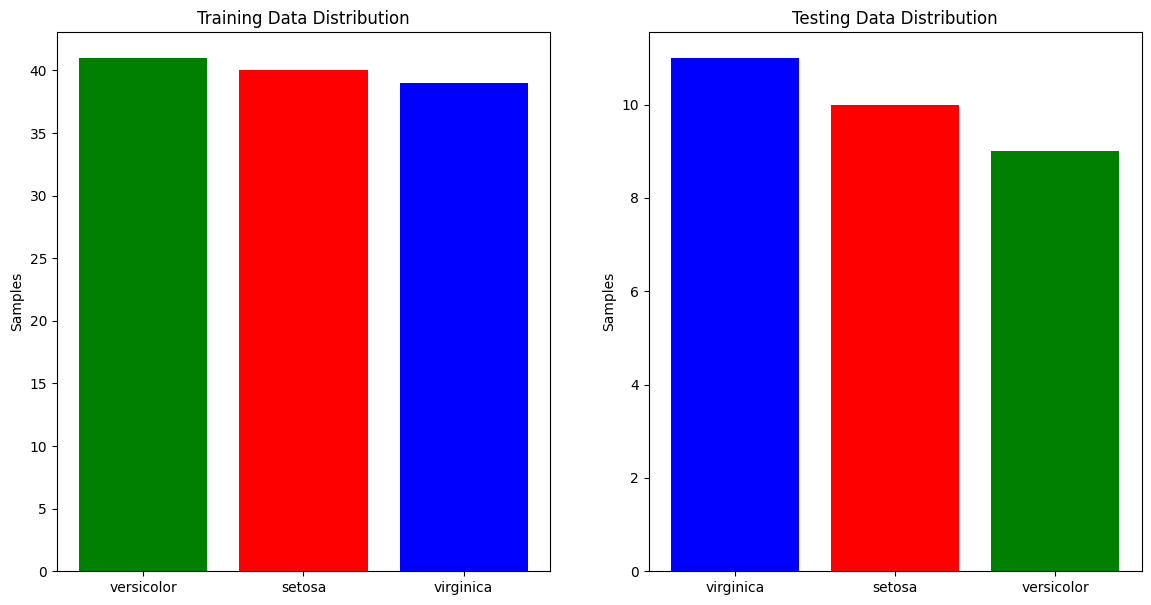

In [13]:
# Define the color dictionary
color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Convert the target variables to pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Get the distribution of the training and testing data
train_distribution = y_train_series.value_counts()
test_distribution = y_test_series.value_counts()

# Create a subplot with 2 columns (for training and testing data)
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot the distribution of the training data
axs[0].bar(
    train_distribution.index,
    train_distribution.values,
    color=[color_dict[i] for i in train_distribution.index]
)
axs[0].set_title('Training Data Distribution')
axs[0].set_ylabel('Samples')

# Plot the distribution of the testing data
axs[1].bar(
    test_distribution.index,
    test_distribution.values,
    color=[color_dict[i] for i in test_distribution.index]
)
axs[1].set_title('Testing Data Distribution')
axs[1].set_ylabel('Samples')

# Display the plot
plt.show()

## 4. Choose an algorithm

### k-Nearest Neighboor (kNN)

![Classification kNN](./images/example_classification_knn.png)

For classification tasks, the k-nearest neighbors (KNN) algorithm works as follows:

1. It calculates the distance (e.g. Euclidean, Manhattan) between a new data point and all the training data points.
2. It selects the k closest training data points to the new point based on the calculated distances. The value of k is a user-defined parameter.
3. It assigns the new data point to the class that is most frequent among the k nearest neighbors (majority vote).

For example, if k=3 and the 3 nearest neighbors of a new point belong to classes A, B, and A respectively, the new point would be classified as A based on the majority vote.

The key aspects are:
- It is a non-parametric, lazy learning algorithm that makes predictions based on similarity with training data.
- The choice of k and distance metric significantly impacts performance. Smaller k can lead to overfitting, larger k to underfitting.
- It works well for problems with irregular decision boundaries but can be computationally expensive for large datasets.

#### Euclidean VS Manhattan Distance

**Euclidean distance** is the straight-line distance between two points. The formula for Euclidean distance in n-dimensional space is:

\begin{equation*}
d = \sqrt{\left(x_1 - y_1 \right)^2 + \left(x_2 - y_2 \right)^2 + \, ... \, + \left(x_N - y_N \right)^2}
\end{equation*}

Euclidean distance is preferred when:
* The data is continuous and follows a Gaussian (normal) distribution.
* All dimensions are equally important and have a similar scale.
* The shortest path between two points is desired, regardless of the coordinate axes.

**Manhattan distance**, also known as **City Block distance** or **L1 norm**, calculates the sum of absolute differences between the coordinates of two points. The formula for Manhattan distance in n-dimensional space is:

\begin{equation*}
d = | x_1 - y_1 | + | x_2 - y_2 | + \, ... \, + | x_N - y_N |
\end{equation*}

Manhattan distance is often preferred when:
* The data is high-dimensional and sparse.
* The variables are not comparable or have different scales.
* The path between two points is constrained to a grid-like path along the coordinate axes, similar to city blocks.
* The data contains outliers, as Manhattan distance is less sensitive to them compared to Euclidean distance.

## 5. Train the model

Instance-based learning does not create a generalized model but uses specific instances from the training data to classify new data points during the testing phase.

In [16]:
k = 3

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt( np.sum( (x1 - x2)**2 ) )

def predict(xtest):
    # Compute distances between x and all examples in the training set
    distances = [euclidean_distance(xtest, xtrain) for xtrain in X_train]
    
    # Sort by distance and return indices of the first k neighbors
    k_indices = np.argsort(distances)[:k]
    
    # Extract the labels of the k nearest neighbor training samples
    k_nearest_labels = [y_train[i] for i in k_indices]
    
    # Return the most common class label
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

y_pred = [predict(xtest) for xtest in X_test]

## 6. Evaluate Model Performance

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

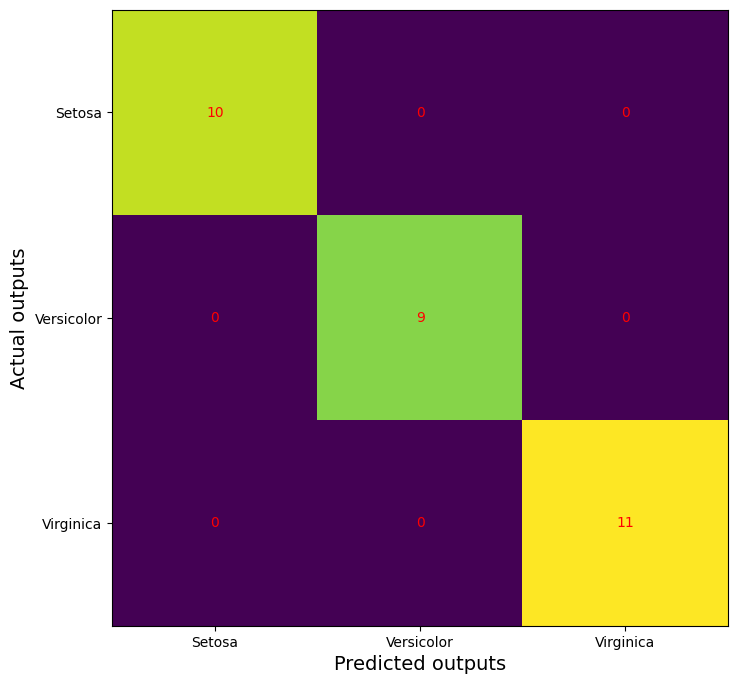

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=14, color='black')
ax.set_ylabel('Actual outputs', fontsize=14, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)

# Add labels for x-axis and y-axis
labels = ['Setosa', 'Versicolor', 'Virginica']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

## 7. Model Tuning and Selection

Parameters that can be tweaked:
- **k**: Number of data points to consider around the instance we want to predict the class of. Smaller k can lead to overfitting, larger k to underfitting.
- **Distance type**: When picking **k** data points closest to the current instance, the closest data points are computed using this distance type.

In our case, we don't need to further exploit model tuning or selection since our trained model can already perfectly represent these 3 classes